# ACV QuickDraw Challenge

QuickDraw Data - https://quickdraw.withgoogle.com/data

QuickDraw Analysis Article - https://ai.googleblog.com/2017/08/exploring-and-visualizing-open-global.html

Student - Tan Yong He

In [ ]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

quickdraw  sample_data


In [ ]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from glob import glob
import ntpath

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf

In [ ]:
arr = np.load('./quickdraw/bee.npy')
arr.shape

(120890, 784)

In [ ]:
file_names = glob('./quickdraw/*.npy')

In [ ]:
# make some class names
class_names = []

for file in file_names:
  name = ntpath.basename(file)
  class_names.append(name[:-4])
  
  
print(class_names)

['cactus', 'banana', 'bee', 'face', 'brain', 'palm tree', 'eyeglasses', 'postcard', 'ambulance', 'pig', 'alarm clock', 'ant', 'fish', 'cat', 'cookie', 'lollipop', 'birthday cake', 'donut', 'rainbow', 'angel']


In [ ]:
# get 200 of each class for plotting

x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(200)]
  arr = np.load(filename)
  arr = arr[:200]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [ ]:
y_labels.shape

(4000,)

In [ ]:
y_labels[190:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## For MNIST

In [ ]:
(mnist_x,mnist_y), (_,_) = tf.keras.datasets.mnist.load_data()
mnist_x =mnist_x.reshape(60000,784)

11493376/11490434 [==============================] - 0s 0us/step


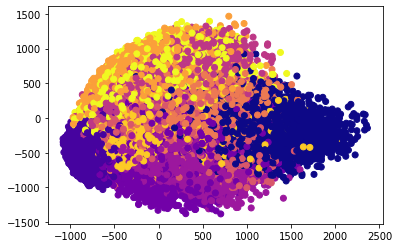

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_x)
groups = mnist_y.tolist()
colors = [int(i % 20) for i in groups]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## PCA for QuickDraw

(2000, 2)


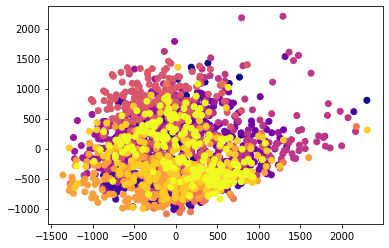

In [ ]:
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(x_data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data[:2000])

print(principalComponents.shape)

groups = y_labels.tolist()
colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## Plot TSNE  for QuickDraw

In [ ]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data[:2000])

print('t-SNE Finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.117s...
[t-SNE] Computed neighbors for 2000 samples in 6.224s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 627.873270
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.610458
[t-SNE] KL divergence after 300 iterations: 1.879925
t-SNE Finished! Time elapsed: 13.441457986831665 seconds


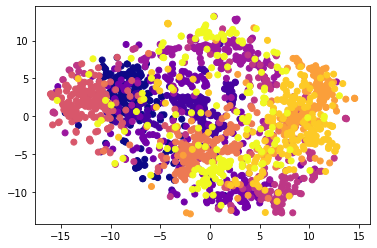

In [ ]:
import matplotlib.cm as cm

groups = y_labels.tolist()

colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

In [ ]:
x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(10000)]
  arr = np.load(filename)
  arr = arr[:10000]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [ ]:
x_data.shape, y_labels.shape

((200000, 784), (200000,))

In [ ]:
y_labels[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
# Shuffle
from sklearn.utils import shuffle

x_data, y_labels = shuffle(x_data, y_labels, random_state=42)


# Train test split
from sklearn.model_selection import train_test_split

split = 0.9

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)


x_train.shape, y_train.shape

((180000, 784), (180000,))

In [ ]:
y_labels[:50]

array([11,  7, 15,  6,  3,  2, 13, 17, 13,  0,  7, 14, 18,  8, 11, 11, 10,
       18,  0, 17, 16,  3,  2, 15,  0,  0,  0, 13, 19,  4, 13,  0,  2,  0,
       11,  9,  3, 12,  1,  6,  6, 16,  5, 12, 14, 14, 13,  7, 19,  6])

## Data Preparation

In [ ]:
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = len(class_names)

In [ ]:
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape((180000, 28, 28))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

In [ ]:
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape((20000, 28, 28))
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_test.shape, y_test.shape

((20000, 28, 28), (20000, 20))

## Data Pipeline

In [ ]:
train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_set = train_set.shuffle(5000)
train_set = train_set.repeat()
train_set = train_set.batch(batch_size, drop_remainder=True)
train_set

<BatchDataset shapes: ((32, 28, 28), (32, 20)), types: (tf.float32, tf.float32)>

In [ ]:
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_set = test_set.shuffle(5000)
test_set = test_set.repeat()
test_set = test_set.batch(batch_size, drop_remainder=True)
test_set

<BatchDataset shapes: ((32, 28, 28), (32, 20)), types: (tf.float32, tf.float32)>

## Model

In [ ]:
def Conv_BatchNorm(x, filters, kernel_size, strides):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [ ]:
def identity_block(orig_x, num_filters):
    x = Conv_BatchNorm(orig_x, filters=num_filters, kernel_size=1, strides=1)
    x = Conv_BatchNorm(x, filters=num_filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*num_filters, kernel_size=1, strides=1)(x)  # notice: filters=4*num_filters
    x = BatchNormalization()(x)
 
    x = Add()([x, orig_x])
    x = ReLU()(x)
    return x

In [ ]:
def projection_block(tensor, num_filters, strides):
    # left stream
    x = Conv_BatchNorm(tensor, filters=num_filters, kernel_size=1, strides=strides)
    x = Conv_BatchNorm(x, filters=num_filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*num_filters, kernel_size=1, strides=1)(x)  # notice: filters=4*num_filters
    x = BatchNormalization()(x)
 
    # right stream
    proj_x = Conv2D(filters=4*num_filters, kernel_size=1, strides=strides)(tensor)  # notice: filters=4*num_filters
    proj_x = BatchNormalization()(proj_x)
 
    x = Add()([x, proj_x])
    x = ReLU()(x)
    return x

In [ ]:
def resnet_block(x, filters, reps, strides):
    x = projection_block(x, num_filters=filters, strides=strides)
    for _ in range(reps-1):
        x = identity_block(x, num_filters=filters)
    return x

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, Add, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.models import Model

input = Input(shape=(28, 28, 1))
 
x = Conv_BatchNorm(input, filters=64, kernel_size=7, strides=2)  # [3]: 7x7, 64, strides 2
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)  # [3]: 3x3 max mool, strides 2
 
x = resnet_block(x, filters=64, reps=3, strides=1)
x = resnet_block(x, filters=128, reps=4, strides=2)  # strides=2 ([2]: conv3_1)
x = resnet_block(x, filters=256, reps=6, strides=2)  # strides=2 ([2]: conv4_1)
x = resnet_block(x, filters=512, reps=3, strides=2)  # strides=2 ([2]: conv5_1)
 
x = GlobalAvgPool2D()(x)  # [3]: average pool *it is not written any pool size so we use Global
 
output = Dense(20, activation='softmax')(x)  # [3]: 20-d fc, softmax
 

 
model = Model(input, output)

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 14, 14, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 14, 14, 64)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Train

In [ ]:
train_steps = int(x_train.shape[0]/batch_size)
test_steps = int(x_test.shape[0]/batch_size)

print('Number of Train Steps:', train_steps)
print('Number of Validation Steps:', test_steps)

Number of Train Steps: 5625
Number of Validation Steps: 625


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

filepath = "best-weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.9, patience=2, min_lr=0.00001)

In [ ]:
history = model.fit(
    train_set, 
    steps_per_epoch=train_steps, 
    epochs=num_epochs, 
    validation_data=test_set, 
    validation_steps=test_steps, 
    callbacks=[checkpoint, reduce_lr])

Epoch 1/10
5625/5625 [==============================] - ETA: 0s - loss: 1.2191 - accuracy: 0.6974
Epoch 00001: val_accuracy improved from -inf to 0.59415, saving model to best-weights-01-0.59.hdf5
5625/5625 [==============================] - 179s 32ms/step - loss: 1.2191 - accuracy: 0.6974 - val_loss: 5.9829 - val_accuracy: 0.5942
Epoch 2/10
5625/5625 [==============================] - ETA: 0s - loss: 0.7201 - accuracy: 0.8072
Epoch 00002: val_accuracy improved from 0.59415 to 0.81190, saving model to best-weights-02-0.81.hdf5
5625/5625 [==============================] - 178s 32ms/step - loss: 0.7201 - accuracy: 0.8072 - val_loss: 0.7929 - val_accuracy: 0.8119
Epoch 3/10
5625/5625 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.8461
Epoch 00003: val_accuracy improved from 0.81190 to 0.83610, saving model to best-weights-03-0.84.hdf5
5625/5625 [==============================] - 178s 32ms/step - loss: 0.5625 - accuracy: 0.8461 - val_loss: 0.6165 - val_accuracy: 0.

## Evaluate 

In [ ]:
model.evaluate(test_set, steps=test_steps)

625/625 [==============================] - 6s 10ms/step - loss: 0.3038 - accuracy: 0.9166


[0.30383777618408203, 0.9165999889373779]